
Ingrese los valores de x separados por comas (ejemplo: 1, 2, 3):
1, 6, 11

Ingrese los valores de y separados por comas (ejemplo: 2, 4, 6):
12, 39, 42

El polinomio de interpolación de Newton es:
        2                
- 0.48⋅x  + 8.76⋅x + 3.72


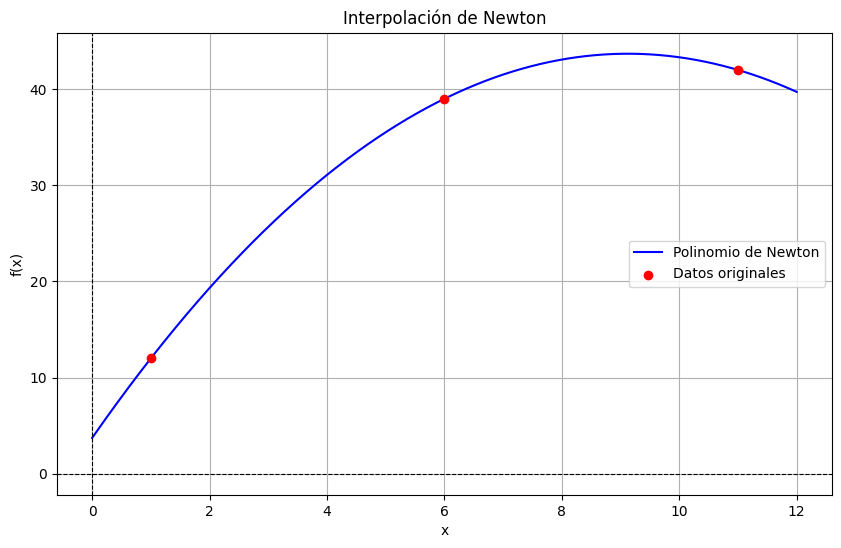

In [1]:
# Código creado por Joshua Mijangos López, 30/12/24
# Este código se debe ejecutar en Google Colab debido al cuadro de diálogo

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Funciones auxiliares

def diferencias_divididas(valores_x, valores_y):
    n = len(valores_x)
    tabla = [valores_y.copy()]

    for i in range(1, n):
        diferencias = []
        for j in range(n - i):
            numerador = tabla[i - 1][j + 1] - tabla[i - 1][j]
            denominador = valores_x[j + i] - valores_x[j]
            diferencias.append(numerador / denominador)
        tabla.append(diferencias)

    return tabla

def interpolacion_newton(valores_x, valores_y):
    x = sp.Symbol('x')
    tabla_dif = diferencias_divididas(valores_x, valores_y)
    n = len(valores_x)

    polinomio = tabla_dif[0][0]
    for i in range(1, n):
        termino = tabla_dif[i][0]
        for j in range(i):
            termino *= (x - valores_x[j])
        polinomio += termino

    return sp.simplify(polinomio)

def graficar_interpolacion(valores_x, valores_y, polinomio, rango_x=(-10, 10), num_puntos=1000):
    x_numerico = np.linspace(rango_x[0], rango_x[1], num_puntos)
    f_lambdificada = sp.lambdify(sp.Symbol('x'), polinomio)
    y_numerico = f_lambdificada(x_numerico)

    # Gráfica
    plt.figure(figsize=(10, 6))
    plt.plot(x_numerico, y_numerico, label='Polinomio de Newton', color='blue')
    plt.scatter(valores_x, valores_y, color='red', label='Datos originales', zorder=5)
    plt.title('Interpolación de Newton')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
    plt.legend()
    plt.grid()
    plt.show()

# Ejemplo de uso
def principal():
    # Solicitar datos al usuario
    print("\nIngrese los valores de x separados por comas (ejemplo: 1, 2, 3):")
    valores_x = list(map(float, input().split(',')))
    print("\nIngrese los valores de y separados por comas (ejemplo: 2, 4, 6):")
    valores_y = list(map(float, input().split(',')))

    if len(valores_x) != len(valores_y):
        print("Error: El número de valores de x y y debe ser igual.")
        return

    # Calcular el polinomio de interpolación
    polinomio = interpolacion_newton(valores_x, valores_y)
    print("\nEl polinomio de interpolación de Newton es:")
    sp.pprint(polinomio)

    # Graficar el polinomio junto con los datos originales
    x_min, x_max = min(valores_x) - 1, max(valores_x) + 1
    graficar_interpolacion(valores_x, valores_y, polinomio, rango_x=(x_min, x_max))

# Ejecutar el código principal
if __name__ == "__main__":
    principal()
